In [31]:
import glob, os
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
import rasterio.mask
import matplotlib.pyplot as plt
from pathlib import Path

print('Successfully imported libraries !')

Successfully imported libraries !


In [3]:
ipath = '/d21/s4s_ucl/CLASSIF/SITE_2/01-01_12-31/RF_OpenCV/SAMPLING_DESIGN_V25/'

poly_file = '/d21/s4s_ucl/SITE_EXTENT/SITE_2/ADM_EXTENT/ESP_SITE_2_MUNICIPALITY_32630.shp'


In [4]:
for classif in glob.glob(f'{ipath}*.tif'):
    print(classif)


crop_map = '/d21/s4s_ucl/CLASSIF/SITE_2/01-01_12-31/RF_OpenCV/SAMPLING_DESIGN_V25/ESP_2018_SITE_2_buf_10_LC_all_EXTENT_wall_to_wall_SEG_RATIO_100_LEVEL_grp_1_SD_25_FEAT_2_CLASSIF_RF_OpenCV_v1_reclassify_pr_7_nb.tif'


/d21/s4s_ucl/CLASSIF/SITE_2/01-01_12-31/RF_OpenCV/SAMPLING_DESIGN_V25/ESP_2018_SITE_2_buf_10_LC_all_EXTENT_wall_to_wall_SEG_RATIO_100_LEVEL_grp_1_SD_25_FEAT_2_CLASSIF_RF_OpenCV_v1_reclassify_pr_8_nb.tif
/d21/s4s_ucl/CLASSIF/SITE_2/01-01_12-31/RF_OpenCV/SAMPLING_DESIGN_V25/ESP_2018_SITE_2_buf_10_LC_all_EXTENT_wall_to_wall_SEG_RATIO_100_LEVEL_grp_1_SD_25_FEAT_2_CLASSIF_RF_OpenCV_v1_reclassify_pr_7_nb.tif
/d21/s4s_ucl/CLASSIF/SITE_2/01-01_12-31/RF_OpenCV/SAMPLING_DESIGN_V25/ESP_2018_SITE_2_buf_10_LC_all_EXTENT_wall_to_wall_SEG_RATIO_100_LEVEL_grp_1_SD_25_FEAT_2_CLASSIF_RF_OpenCV_v1.tif


### Open vector file with `geopandas`

In [20]:
gdf = gpd.read_file(poly_file)
gdf

,OID_,Name,Shape_Area,INSPIREID,COUNTRY,NATLEV,NATLEVNAME,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,geometry
0,1,CYL,None,ES.IGN.BDDAE.34074949157,ES,https://inspire.ec.europa.eu/codelist/Administ...,Municipio,34074949157,Pino del Oro,ES4,ES41,ES419,"POLYGON Z ((236665.899 4608143.203 0.000, 2366..."
1,1,CYL,None,ES.IGN.BDDAE.34074949159,ES,https://inspire.ec.europa.eu/codelist/Administ...,Municipio,34074949159,Pobladura del Valle,ES4,ES41,ES419,"POLYGON Z ((270935.278 4664263.219 0.000, 2710..."
2,1,CYL,None,ES.IGN.BDDAE.34074949160,ES,https://inspire.ec.europa.eu/codelist/Administ...,Municipio,34074949160,Pobladura de Valderaduey,ES4,ES41,ES419,"POLYGON Z ((287582.538 4618832.499 0.000, 2877..."
3,1,CYL,None,ES.IGN.BDDAE.34074949163,ES,https://inspire.ec.europa.eu/codelist/Administ...,Municipio,34074949163,Pozoantiguo,ES4,ES41,ES419,"POLYGON Z ((292350.407 4608245.381 0.000, 2923..."
4,1,CYL,None,ES.IGN.BDDAE.34074949164,ES,https://inspire.ec.europa.eu/codelist/Administ...,Municipio,34074949164,Pozuelo de Tábara,ES4,ES41,ES419,"POLYGON Z ((254098.927 4630441.389 0.000, 2545..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,1,CYL,None,ES.IGN.BDDAE.34074949151,ES,https://inspire.ec.europa.eu/codelist/Administ...,Municipio,34074949151,El Perdigón,ES4,ES41,ES419,"POLYGON Z ((267966.547 4590240.000 0.000, 2647..."
630,1,CYL,None,ES.IGN.BDDAE.34074949152,ES,https://inspire.ec.europa.eu/codelist/Administ...,Municipio,34074949152,Pereruela,ES4,ES41,ES419,MULTIPOLYGON Z (((264716.241 4590240.000 0.000...
631,1,CYL,None,ES.IGN.BDDAE.34074949153,ES,https://inspire.ec.europa.eu/codelist/Administ...,Municipio,34074949153,Perilla de Castro,ES4,ES41,ES419,"POLYGON Z ((257225.040 4623244.360 0.000, 2572..."
632,1,CYL,None,ES.IGN.BDDAE.34074949155,ES,https://inspire.ec.europa.eu/codelist/Administ...,Municipio,34074949155,Piedrahita de Castro,ES4,ES41,ES419,"POLYGON Z ((269988.304 4616624.377 0.000, 2698..."


### Open crop map with `rasterio`

<AxesSubplot:>

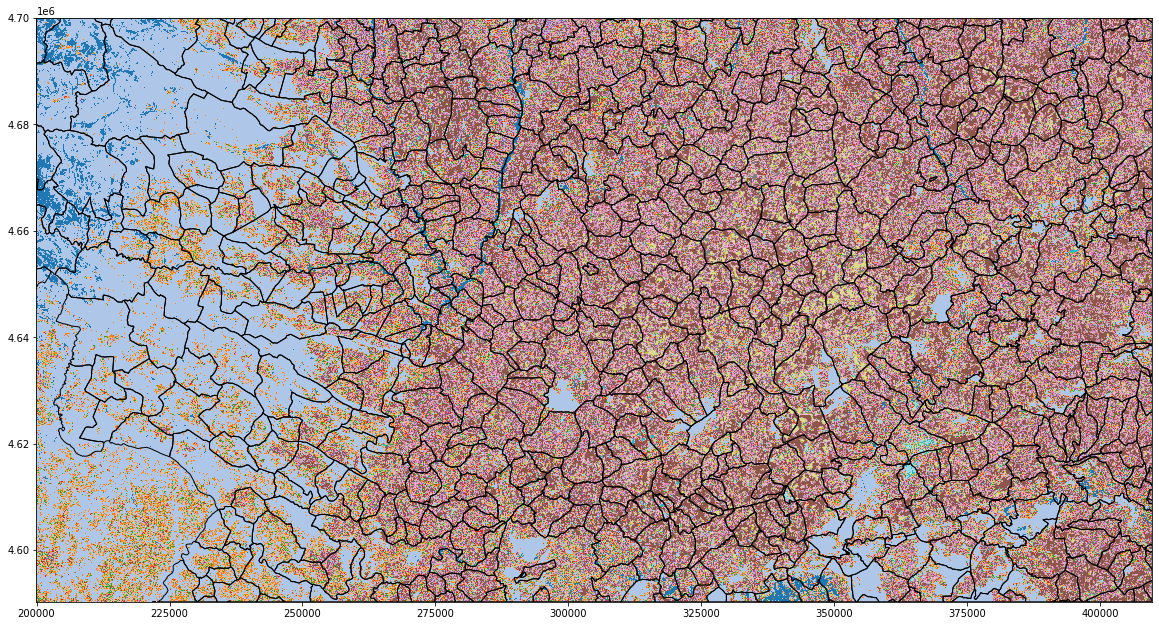

In [23]:
src = rasterio.open(crop_map, "r")

fig, ax = plt.subplots(1, figsize=(20, 20))

rasterio.plot.show(src, cmap='tab20', ax=ax)

gdf.plot(facecolor='none', edgecolor='black',ax=ax)


In [28]:
dict_list = []

for i in range(0,len(gdf))[0:3]:
    
    fid  = gdf.loc[i,'NATCODE']
    geom = gdf.geometry[[i]]
    print(f'FID {fid}')
    
    # Crop the raster to the extent of the shape
    out_image, out_transform = rasterio.mask.mask(src, geom, crop=False)

    out_image = out_image[0]
    #print(out_image.shape)

    #plt.imshow(out_image, interpolation='none')
    #plt.show()

    unique, counts = np.unique(out_image, return_counts=True)
    
    dict_count = dict(zip(unique, counts))

    dict_count['id'] = fid

    dict_list.append(dict_count)

print(dict_list)



FID 34074949157
{0: 230086379, 2: 576, 3: 248928, 11: 6971, 14: 414, 15: 10, 17: 208, 19: 38874}
FID 34074949159
{0: 230240743, 2: 16864, 3: 57006, 11: 42210, 14: 901, 15: 4, 17: 4952, 18: 390, 19: 19290}
FID 34074949160
{0: 230256781, 2: 215, 3: 47705, 11: 57352, 14: 9254, 17: 8777, 19: 2276}
[{0: 230086379, 2: 576, 3: 248928, 11: 6971, 14: 414, 15: 10, 17: 208, 19: 38874, 'id': '34074949157'}, {0: 230240743, 2: 16864, 3: 57006, 11: 42210, 14: 901, 15: 4, 17: 4952, 18: 390, 19: 19290, 'id': '34074949159'}, {0: 230256781, 2: 215, 3: 47705, 11: 57352, 14: 9254, 17: 8777, 19: 2276, 'id': '34074949160'}]


In [29]:
df = pd.DataFrame(dict_list).set_index('id')
df

,0,2,3,11,14,15,17,19,18
id,,,,,,,,,
34074949157,230086379,576,248928,6971,414,10.0,208,38874,NaN
34074949159,230240743,16864,57006,42210,901,4.0,4952,19290,390.0
34074949160,230256781,215,47705,57352,9254,NaN,8777,2276,NaN


In [32]:
df["sum"] = df.sum(axis=1)
df

,0,2,3,11,14,15,17,19,18,sum
id,,,,,,,,,,
34074949157,230086379,576,248928,6971,414,10.0,208,38874,NaN,230382360.0
34074949159,230240743,16864,57006,42210,901,4.0,4952,19290,390.0,230382360.0
34074949160,230256781,215,47705,57352,9254,NaN,8777,2276,NaN,230382360.0


Close dataset

In [ ]:
src.close()